In [19]:
%matplotlib inline
import os, sys
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from os.path import join, isfile

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
#data_path = '/home/ymm/kaggle/bosch/full_data_FE_cross_fit_xgb_models/grid_search_FE_regular_with_id_xgb_models'
data_path = '/home/ymm/kaggle/xgboost_hyperopt/scripts/xgb_model_features_0'

In [3]:
def collect_feature_names(data_path, fea_name='feature', thres_name = None, thres = 10):
    csv_files = [f for f in os.listdir(data_path) if '.csv' in f]
    feature_names = set()
    for file_name in csv_files:
        data = pd.read_csv(join(data_path, file_name), index_col=0)
        if thres_name is None:
            feature_names = feature_names.union(data[fea_name])
        else:
            feature_names = feature_names.union(data.loc[data[thres_name] > thres, fea_name])
            
    return feature_names


def combine_feature_importance_files(data_path, fea_name='feature', thres_name = None, thres = 10):
    csv_files = [f for f in os.listdir(data_path) if '.csv' in f]
    fea_imp = None
    file_counter = -1
    score_columns = []
    norm_score_columns = []
    
    for file_name in csv_files:
        data = pd.read_csv(join(data_path, file_name), index_col=0)
        
        if thres_name is not None:
            data = data.loc[data[thres_name] > thres]
            
        data = data.set_index(fea_name)
        print data.shape
        file_counter += 1
        data.columns = ['{}_{}'.format(column, file_counter) for column in data.columns]
        score_columns.append('{}_{}'.format('fscore', file_counter))
        norm_score_columns.append('{}_{}'.format('norm_fscore', file_counter))
        if fea_imp is None:
            fea_imp = data
        else:
            fea_imp = pd.merge(fea_imp, data, how='outer', left_index=True, right_index=True)
    
    fea_imp['fscore_sum'] = fea_imp[score_columns].sum(axis=1)
    fea_imp['norm_fscore_sum'] = fea_imp[norm_score_columns].sum(axis=1)
    return fea_imp



def combine_feature_score(data_path, fea_name='feature', score_name = None):
    csv_files = [f for f in os.listdir(data_path) if '.csv' in f]
    fea_score = None
    
    for i, file_name in enumerate(csv_files):
        data = pd.read_csv(join(data_path, file_name), index_col=0)
        data = data.set_index([fea_name])
        col_name = '{}_{}'.format(score_name, i)
        
        if fea_score is None:
            fea_score = pd.DataFrame()
        
        fea_score[col_name] = data[score_name]

            #fea_score = pd.merge(fea_score, data, how='outer', left_index=True, right_index=True)
            
    return fea_score

In [16]:
#tmp = combine_feature_importance_files(data_path)
#combined_imp = combine_feature_importance_files(data_path, thres_name = 'fscore')
combined_imp = combine_feature_importance_files(data_path)

(1152, 2)
(1209, 2)
(1216, 2)
(1168, 2)
(1204, 2)


In [17]:
print combined_imp.shape
combined_imp.tail()

(1557, 12)


,fscore_0,norm_fscore_0,fscore_1,norm_fscore_1,fscore_2,norm_fscore_2,fscore_3,norm_fscore_3,fscore_4,norm_fscore_4,fscore_sum,norm_fscore_sum
feature,,,,,,,,,,,,
time_ratio_value,39.0,0.001889,36.0,0.001778,63.0,0.003080,71.0,0.003438,28.0,0.00140,237.0,0.011585
time_ratio_value_index,78.0,0.003779,54.0,0.002667,112.0,0.005475,79.0,0.003826,95.0,0.00475,418.0,0.020496
time_ratio_value_index_diff_0,69.0,0.003343,85.0,0.004198,43.0,0.002102,104.0,0.005037,66.0,0.00330,367.0,0.017979
time_ratio_value_index_diff_1,48.0,0.002325,55.0,0.002716,44.0,0.002151,51.0,0.002470,44.0,0.00220,242.0,0.011862
time_sum,31.0,0.001502,79.0,0.003902,57.0,0.002787,34.0,0.001647,54.0,0.00270,255.0,0.012536


In [18]:
print combined_imp.shape
combined_imp.head()

(1557, 12)


,fscore_0,norm_fscore_0,fscore_1,norm_fscore_1,fscore_2,norm_fscore_2,fscore_3,norm_fscore_3,fscore_4,norm_fscore_4,fscore_sum,norm_fscore_sum
feature,,,,,,,,,,,,
L0_S0_F0,31.0,0.001502,58.0,0.002864,32.0,0.001564,29.0,0.001404,26.0,0.00130,176.0,0.008635
L0_S0_F10,12.0,0.000581,10.0,0.000494,32.0,0.001564,15.0,0.000726,16.0,0.00080,85.0,0.004166
L0_S0_F12,34.0,0.001647,30.0,0.001482,10.0,0.000489,10.0,0.000484,11.0,0.00055,95.0,0.004652
L0_S0_F14,9.0,0.000436,26.0,0.001284,4.0,0.000196,14.0,0.000678,12.0,0.00060,65.0,0.003194
L0_S0_F16,25.0,0.001211,50.0,0.002469,53.0,0.002591,44.0,0.002131,25.0,0.00125,197.0,0.009652


In [6]:
## sort by the norm_fscore_sum
sorted_combined_imp = combined_imp.sort_values(by=['norm_fscore_sum'], ascending=False)

In [15]:
sorted_combined_imp.head(20)

,fscore_0,norm_fscore_0,fscore_1,norm_fscore_1,fscore_2,norm_fscore_2,fscore_3,norm_fscore_3,fscore_4,norm_fscore_4,fscore_sum,norm_fscore_sum
feature,,,,,,,,,,,,
first_time_value_index_diff_1,240.0,0.011626,316.0,0.015606,315.0,0.015400,311.0,0.015061,241.0,0.012049,1423.0,0.069742
L3_S33_F3865,156.0,0.007557,125.0,0.006173,124.0,0.006062,228.0,0.011042,123.0,0.006149,756.0,0.036984
num_L3_S33_mean_index_diff_1,153.0,0.007412,118.0,0.005828,107.0,0.005231,184.0,0.008911,180.0,0.008999,742.0,0.036380
L1_S24_F1723,142.0,0.006879,142.0,0.007013,143.0,0.006991,109.0,0.005279,171.0,0.008549,707.0,0.034711
L3_S29_F3351,153.0,0.007412,204.0,0.010075,77.0,0.003764,71.0,0.003438,171.0,0.008549,676.0,0.033239
L3_S30_F3704,147.0,0.007121,159.0,0.007853,41.0,0.002004,163.0,0.007894,164.0,0.008199,674.0,0.033071
L1_S24_F1846,150.0,0.007266,109.0,0.005383,86.0,0.004204,148.0,0.007167,124.0,0.006199,617.0,0.030221
L3_S30_F3744,83.0,0.004021,111.0,0.005482,146.0,0.007138,142.0,0.006877,93.0,0.004650,575.0,0.028167
cat_max,132.0,0.006394,114.0,0.005630,187.0,0.009142,78.0,0.003777,50.0,0.002500,561.0,0.027444


In [14]:
sorted_combined_imp.tail(20)

,fscore_0,norm_fscore_0,fscore_1,norm_fscore_1,fscore_2,norm_fscore_2,fscore_3,norm_fscore_3,fscore_4,norm_fscore_4,fscore_sum,norm_fscore_sum
feature,,,,,,,,,,,,
L1_S24_F1814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,0.00055,11.0,0.000550
L1_S24_F810,NaN,NaN,11.0,0.000543,NaN,NaN,NaN,NaN,NaN,NaN,11.0,0.000543
L0_S19_F455,NaN,NaN,11.0,0.000543,NaN,NaN,NaN,NaN,NaN,NaN,11.0,0.000543
dat_L0_min,NaN,NaN,11.0,0.000543,NaN,NaN,NaN,NaN,NaN,NaN,11.0,0.000543
first_column_step_4,NaN,NaN,11.0,0.000543,NaN,NaN,NaN,NaN,NaN,NaN,11.0,0.000543
L1_S24_F1808,NaN,NaN,11.0,0.000543,NaN,NaN,NaN,NaN,NaN,NaN,11.0,0.000543
L3_S36_F3924,NaN,NaN,11.0,0.000543,NaN,NaN,NaN,NaN,NaN,NaN,11.0,0.000543
L1_S24_F691,NaN,NaN,NaN,NaN,11.0,0.000538,NaN,NaN,NaN,NaN,11.0,0.000538
L1_S25_F1885,NaN,NaN,NaN,NaN,11.0,0.000538,NaN,NaN,NaN,NaN,11.0,0.000538


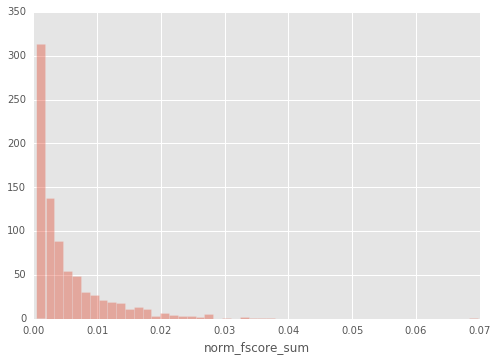

In [7]:
sns.distplot(sorted_combined_imp['norm_fscore_sum'], bins=50, kde=False)

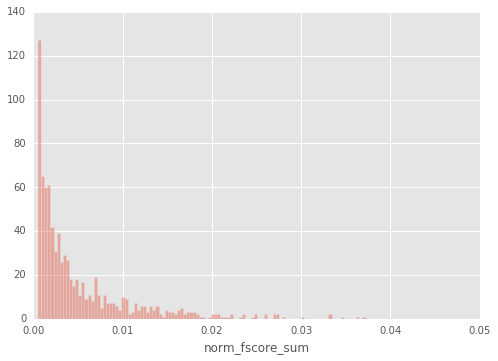

In [8]:
plt.xlim(0, 0.05)
sns.distplot(sorted_combined_imp['norm_fscore_sum'], bins=200, kde=False)

In [48]:
sorted_combined_imp.shape

(821, 26)

In [49]:
sum(sorted_combined_imp['norm_fscore_sum'] >= 0.005)

421

In [56]:
sorted_combined_imp.head()

,fscore_0,norm_fscore_0,fscore_1,norm_fscore_1,fscore_2,norm_fscore_2,fscore_3,norm_fscore_3,fscore_4,norm_fscore_4,...,fscore_8,norm_fscore_8,fscore_9,norm_fscore_9,fscore_10,norm_fscore_10,fscore_11,norm_fscore_11,fscore_sum,norm_fscore_sum
feature,,,,,,,,,,,,,,,,,,,,,
first_time_value_index_diff_1,1357.0,0.013342,1480.0,0.014495,773.0,0.032962,1701.0,0.011999,1198.0,0.018810,...,1723.0,0.012308,747.0,0.031607,1671.0,0.011886,1152.0,0.018246,15033.0,0.228153
L3_S33_F3857,1317.0,0.012948,1226.0,0.012007,316.0,0.013475,1797.0,0.012676,648.0,0.010175,...,1745.0,0.012465,391.0,0.016544,1874.0,0.013330,708.0,0.011214,12276.0,0.149472
last_time_value_index_diff_1,1015.0,0.009979,1059.0,0.010372,410.0,0.017483,1310.0,0.009241,840.0,0.013189,...,1488.0,0.010629,382.0,0.016163,1329.0,0.009453,743.0,0.011768,10737.0,0.145426
L3_S33_F3859,1223.0,0.012024,1161.0,0.011371,264.0,0.011258,1722.0,0.012147,744.0,0.011682,...,1556.0,0.011115,375.0,0.015867,1649.0,0.011729,786.0,0.012449,11676.0,0.144343
last_time_value_index_diff_0,1020.0,0.010028,1087.0,0.010646,350.0,0.014925,1351.0,0.009530,707.0,0.011101,...,1391.0,0.009937,310.0,0.013117,1320.0,0.009389,612.0,0.009693,10258.0,0.132143


In [62]:
missing_row_counts = sorted_combined_imp.isnull().sum(axis=1)

In [63]:
sum(missing_row_counts > 0)

518

In [25]:
sorted_combined_imp.tail(200)

,fscore_0,norm_fscore_0,fscore_1,norm_fscore_1,fscore_2,norm_fscore_2,fscore_3,norm_fscore_3,fscore_4,norm_fscore_4,...,fscore_8,norm_fscore_8,fscore_9,norm_fscore_9,fscore_10,norm_fscore_10,fscore_11,norm_fscore_11,fscore_sum,norm_fscore_sum
feature,,,,,,,,,,,,,,,,,,,,,
L1_S24_F1180,17.0,0.000167,12.0,0.000118,NaN,NaN,16.0,0.000113,NaN,NaN,...,19.0,0.000136,NaN,NaN,25.0,0.000178,NaN,NaN,112.0,0.000997
L1_S24_F1255,22.0,0.000216,NaN,NaN,NaN,NaN,13.0,0.000092,NaN,NaN,...,NaN,NaN,NaN,NaN,36.0,0.000256,15.0,0.000238,98.0,0.000989
L1_S25_F2985,44.0,0.000433,20.0,0.000196,NaN,NaN,28.0,0.000198,NaN,NaN,...,11.0,0.000079,NaN,NaN,11.0,0.000078,NaN,NaN,114.0,0.000983
L1_S25_F2317,NaN,NaN,NaN,NaN,13.0,0.000554,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,14.0,0.000100,NaN,NaN,48.0,0.000981
L1_S25_F2464,NaN,NaN,NaN,NaN,NaN,NaN,12.0,0.000085,NaN,NaN,...,NaN,NaN,NaN,NaN,39.0,0.000277,NaN,NaN,89.0,0.000954
L1_S25_F1997,NaN,NaN,25.0,0.000245,NaN,NaN,14.0,0.000099,NaN,NaN,...,NaN,NaN,NaN,NaN,26.0,0.000185,18.0,0.000285,96.0,0.000938
L1_S25_F3001,19.0,0.000187,37.0,0.000362,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,54.0,0.000384,NaN,NaN,110.0,0.000933
L1_S25_F1953,20.0,0.000197,11.0,0.000108,NaN,NaN,18.0,0.000127,NaN,NaN,...,NaN,NaN,NaN,NaN,12.0,0.000085,11.0,0.000174,87.0,0.000925
L1_S25_F2456,NaN,NaN,53.0,0.000519,NaN,NaN,32.0,0.000226,NaN,NaN,...,23.0,0.000164,NaN,NaN,NaN,NaN,NaN,NaN,108.0,0.000909


(array([ 394.,  104.,   67.,   53.,   38.,   28.,   24.,   22.,   17.,
          12.,   10.,    7.,    6.,    5.,    7.,    3.,    4.,    3.,
           2.,    2.,    3.,    1.,    1.,    0.,    0.,    0.,    0.,
           2.,    2.,    0.,    0.,    2.,    1.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.]),
 array([  7.75942947e-05,   4.63910696e-03,   9.20061963e-03,
          1.37621323e-02,   1.83236450e-02,   2.28851576e-02,
          2.74466703e-02,   3.20081830e-02,   3.65696956e-02,
          4.11312083e-02,   4.56927210e-02,   5.02542336e-02,
          5.48157463e-02,   5.93772590e-02,   6.39387716e-02,
          6.85002843e-02,   7.30617970e-02,   7.76233096e-02,
          8.21848223e-02,   8.67463350e-02,   9.13078476e-02,
          9.58693603e-02,   1.00430873e-01,   1.04992386e-01,
          1.09553898e-01,   1.14115411e-01,   1.18676924e-01,
          1.23238436e-01,   1.27799949e-01

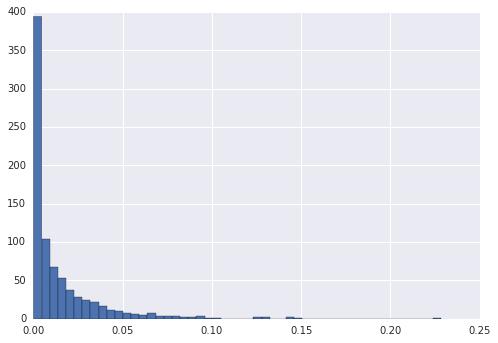

In [16]:
plt.hist(combined_imp['norm_fscore_sum'], bins=50)

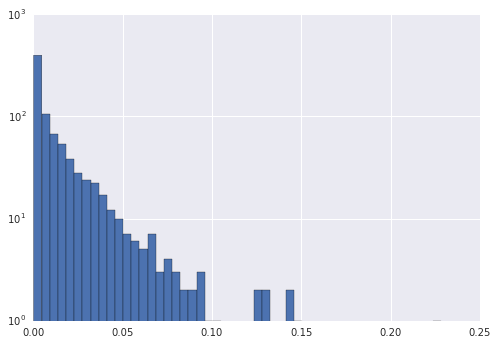

In [14]:
plt.hist(combined_imp['norm_fscore_sum'], bins=50)
plt.gca().set_yscale("log")

In [ ]:
sorted_combined_imp.to_csv('~/full_data_xgb_feature_importance.csv')

In [12]:
top_variable = combined_imp.sort('fscore_sum')[-300:].index

/mnt/home/ymm/.virtualenvs/kaggle/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [13]:
for col in top_variable:
    if col in train_cat_cols.columns:
        print col

NameError: name 'train_cat_cols' is not defined

In [15]:
raw_data_path = '/home/ymm/bosch/'

train_num_file   = 'train_numeric.csv'
train_cat_file   = 'train_categorical.csv'
train_date_file  = 'train_date.csv'
test_num_file    = 'test_numeric.csv'
test_cat_file    = 'test_categorical.csv'
test_date_file   = 'test_date.csv'
sample_submission_file   = 'sample_submission.csv'

start_time_column_name = 'L0_S0_D1'
id_column_name = 'Id'
dep_var_name = 'Response'

train_cat_cols = pd.read_csv(join(raw_data_path, train_cat_file), index_col=id_column_name, nrows=0)
train_date_cols = pd.read_csv(join(raw_data_path, train_date_file), index_col=id_column_name, nrows=0)
train_num_cols = pd.read_csv(join(raw_data_path, train_num_file), index_col=id_column_name, nrows=0)

In [50]:
## important column disribution
print sum(train_num_cols.columns.isin(combined_imp.index)), sum(train_cat_cols.columns.isin(combined_imp.index)), sum(train_date_cols.columns.isin(combined_imp.index))

291 12 66


In [63]:
selected_cat_col_names = train_cat_cols.columns[train_cat_cols.columns.isin(combined_imp.index)]

In [64]:
selected_combined_imp = combined_imp.ix[selected_cat_col_names]

In [65]:
print selected_combined_imp.shape
selected_combined_imp.head()

(12, 8)


,fscore_0,norm_fscore_0,fscore_1,norm_fscore_1,fscore_2,norm_fscore_2,fscore_3,norm_fscore_3
L2_S26_F3038,NaN,NaN,19.0,0.000348,NaN,NaN,NaN,NaN
L2_S27_F3131,NaN,NaN,NaN,NaN,NaN,NaN,15.0,0.000274
L3_S29_F3317,14.0,0.000259,13.0,0.000238,11.0,0.000205,29.0,0.000529
L3_S29_F3475,NaN,NaN,17.0,0.000311,NaN,NaN,14.0,0.000256
L3_S32_F3851,100.0,0.001847,190.0,0.003476,89.0,0.001661,141.0,0.002574


In [70]:
bin_NaN_data_path = '/home/ymm/kaggle/bosch/data_2_bins_xgb_combined_models/data_bin_NaN_models'
combined_nan_imp = combine_feature_importance_files(bin_NaN_data_path, thres_name = 'fscore')

(516, 2)
(515, 2)
(512, 2)
(514, 2)
(513, 2)


In [73]:
common_col_names = set(combined_nan_imp.index).intersection(set(combined_imp.index))

In [76]:
print len(combined_imp.index), len(common_col_names), len(combined_nan_imp)

370 200 568


In [77]:
combined_nan_imp.ix[common_col_names]

,fscore_0,norm_fscore_0,fscore_1,norm_fscore_1,fscore_2,norm_fscore_2,fscore_3,norm_fscore_3,fscore_4,norm_fscore_4
feature,,,,,,,,,,
L2_S26_F3106,200.0,0.004508,207.0,0.004660,229.0,0.005204,215.0,0.004894,208.0,0.004723
L3_S43_F4090,11.0,0.000248,13.0,0.000293,NaN,NaN,NaN,NaN,12.0,0.000273
L3_S43_F4095,12.0,0.000270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
L2_S27_F3155,83.0,0.001871,78.0,0.001756,65.0,0.001477,86.0,0.001957,76.0,0.001726
L3_S31_F3842,44.0,0.000992,41.0,0.000923,42.0,0.000954,41.0,0.000933,48.0,0.001090
L3_S34_F3882,14.0,0.000316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
L3_S30_F3819,142.0,0.003200,155.0,0.003489,135.0,0.003068,160.0,0.003642,141.0,0.003202
L3_S30_F3804,313.0,0.007054,340.0,0.007654,307.0,0.006976,292.0,0.006646,307.0,0.006972
L3_S41_F4006,28.0,0.000631,28.0,0.000630,27.0,0.000614,36.0,0.000819,26.0,0.000590


In [81]:
combined_nan_imp.head()

,fscore_0,norm_fscore_0,fscore_1,norm_fscore_1,fscore_2,norm_fscore_2,fscore_3,norm_fscore_3,fscore_4,norm_fscore_4
feature,,,,,,,,,,
L0_S12_F330,159.0,0.003584,177.0,0.003985,128.0,0.002909,177.0,0.004029,163.0,0.003702
L0_S12_F332,149.0,0.003358,155.0,0.003489,151.0,0.003431,148.0,0.003369,139.0,0.003157
L0_S12_F334,143.0,0.003223,147.0,0.003309,151.0,0.003431,119.0,0.002709,140.0,0.003179
L0_S12_F336,79.0,0.001780,70.0,0.001576,67.0,0.001522,77.0,0.001753,85.0,0.001930
L0_S12_F338,56.0,0.001262,60.0,0.001351,64.0,0.001454,67.0,0.001525,68.0,0.001544


### Analysis on single feature importance file

In [7]:
data_files =  [f for f in os.listdir(data_path) if '.csv' in f]
data = pd.read_csv(join(data_path, data_files[0]), index_col=0)
tmp = data.loc[data['fscore']>10 ,'feature']

In [38]:
print data.shape
data.tail(10)

(488, 3)


,feature,fscore,norm_fscore
478,L3_S33_F3857,625,0.011546
479,L3_S30_F3749,659,0.012174
480,L3_S30_F3744,730,0.013486
481,L0_S0_F16,755,0.013948
482,L0_S1_F28,805,0.014872
483,L3_S30_F3754,882,0.016294
484,L3_S33_F3859,962,0.017772
485,L0_S0_F20,1050,0.019398
486,L3_S32_F3854,1063,0.019638
487,start_time,1464,0.027046


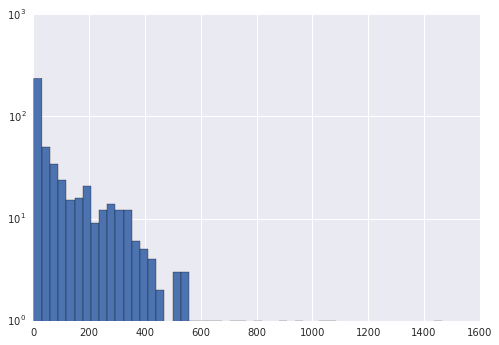

In [9]:
plt.hist(data['fscore'], bins=50)
plt.gca().set_yscale("log")

In [10]:
print data.shape
data.head()

(488, 3)


,feature,fscore,norm_fscore
0,L1_S25_F2131,1,0.000018
1,L3_S30_F3734,1,0.000018
2,L3_S47_F4148,1,0.000018
3,L3_S37_D3947,1,0.000018
4,L0_S12_F334,1,0.000018


In [164]:
tmp = data.feature.apply(lambda x: x.split('_')[2][0])

In [165]:
tmp.value_counts()

F    812
Name: feature, dtype: int64

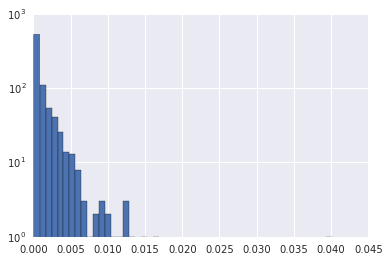

In [151]:
plt.hist(data['norm_fscore'], bins=50)
plt.gca().set_yscale("log")

In [43]:
data_files =  [f for f in os.listdir(data_path) if '.csv' in f]
data = pd.read_csv(join(data_path, data_files[0]), index_col=0)
tmp = data.loc[data['fscore']>10 ,'feature']

In [44]:
data.tail(20)

,feature,fscore,norm_fscore
468,L3_S30_F3804,451,0.008332
469,L3_S33_F3865,453,0.008369
470,L3_S30_F3534,499,0.009219
471,L3_S30_F3809,513,0.009477
472,L0_S0_F0,520,0.009607
473,L0_S0_F2,528,0.009754
474,L3_S29_F3348,547,0.010105
475,L0_S1_F24,553,0.010216
476,L3_S30_F3759,569,0.010512
477,L0_S0_F18,588,0.010863


In [127]:
len(full_union)

736